In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [2]:
# Script definitions
# ------------------

# Euclidean Distance - data_1.csv

data_file = '../../lab3/data/data.2.csv'
images_dir = '../images/convolucion'

# Fix values for the number of operations
# Value indicated in the lab3 documentation
# 2.5 * 1024 * 1024 * 1024 = 2.5 GB in 4 bytes (float) elements

fixed_n = (2.5 * 1024 * 1024 * 1024) / 4

In [3]:
if not os.path.exists(images_dir):

	os.system("mkdir -p " + images_dir)

else :

	os.system("rm -r " + images_dir)
	os.system("mkdir -p " + images_dir)


In [4]:
data = pd.read_csv(data_file, sep=',', header=None)

# Eucliean distance - printf("PAE,%d,%ld,%d,%d,%f,%f,%f,%f,%f,%f,%f,PAE\n", num_threads, n, scheduling_types[i], chunk_sizes[j], overhead_time, malloc_time, init_time, automatic_time, manual_time, secuential_time, total_time);

# Convolucion - printf("\nPAE,%s,%d,%zu,%d,%d,%s,%f,%f,%f,%f,%f,%f,%f,PAE\n",image_filename, num_threads, imageSize,scheduling_types[i], chunk_sizes[j],method_names[method], overhead_time, load_time,malloc_time, par_time, seq_time, speedup, total_time);

data.columns = ['image_filename','num_threads', 'imageSize', 'scheduling_type', 'chunk_size', 'method_name','overhead_time', 'load_time', 'malloc_time', 'par_time', 'seq_time', 'speedup', 'total_time']

print("Total rows: {0}".format(len(data)))

data


Total rows: 19200


,image_filename,num_threads,imageSize,scheduling_type,chunk_size,method_name,overhead_time,load_time,malloc_time,par_time,seq_time,speedup,total_time
0,./images/grayscale_by_cols.pgm,1,104857600,1,1,rows-only,0.0,0.356404,0.000012,1.677325,1.583262,0.943921,3.617004
1,./images/grayscale_by_cols.pgm,1,104857600,1,2,rows-only,0.0,0.356404,0.000012,1.620861,1.583262,0.976803,3.560539
2,./images/grayscale_by_cols.pgm,1,104857600,1,4,rows-only,0.0,0.356404,0.000012,1.621690,1.583262,0.976304,3.561368
3,./images/grayscale_by_cols.pgm,1,104857600,1,8,rows-only,0.0,0.356404,0.000012,1.622532,1.583262,0.975797,3.562211
4,./images/grayscale_by_cols.pgm,1,104857600,1,16,rows-only,0.0,0.356404,0.000012,1.623121,1.583262,0.975443,3.562799
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19195,./images/grayscale_by_rows.pgm,64,104857600,4,32,collapse(2),0.0,0.338003,0.000012,0.025711,1.575313,61.269194,1.939039
19196,./images/grayscale_by_rows.pgm,64,104857600,4,64,collapse(2),0.0,0.338003,0.000012,0.025708,1.575313,61.278321,1.939035
19197,./images/grayscale_by_rows.pgm,64,104857600,4,128,collapse(2),0.0,0.338003,0.000012,0.026095,1.575313,60.369439,1.939422
19198,./images/grayscale_by_rows.pgm,64,104857600,4,256,collapse(2),0.0,0.338003,0.000012,0.025616,1.575313,61.496689,1.938944


In [5]:
data = data[data['overhead_time'] < 0.1]

print("Total rows: {0}".format(len(data)))

Total rows: 19200


In [6]:
# Scheduling types
scheduling_types = {
	1: 'Static',
	2: 'Dynamic',
	3: 'Guided',
	4: 'Auto'
}

data['scheduling_type_name'] = data['scheduling_type'].map(scheduling_types)

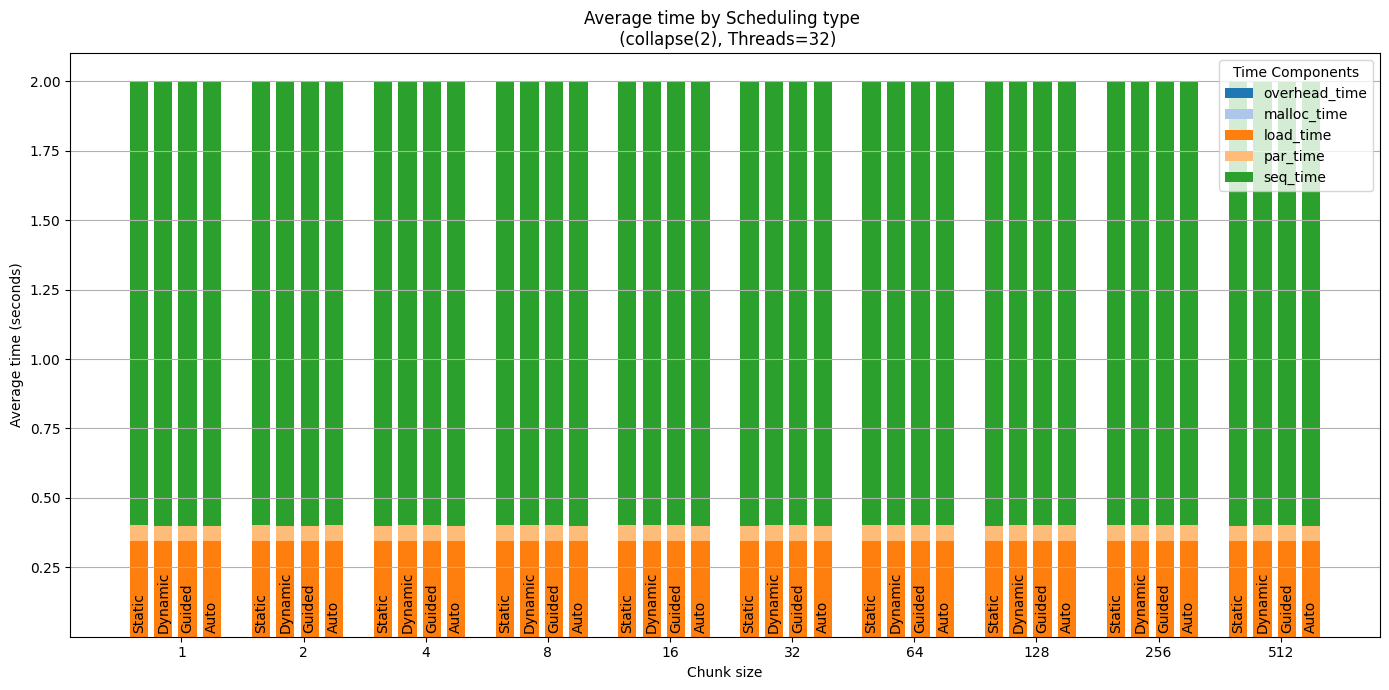

In [7]:
fixed_threads = 32
fixed_method = 'collapse(2)'

filtered_data = data[(data['num_threads'] == fixed_threads) & (data['method_name'] == fixed_method)]

grouped = filtered_data.groupby(['chunk_size', 'scheduling_type']).mean(numeric_only=True).reset_index()

chunk_sizes = sorted(grouped['chunk_size'].unique())
scheduling_values = sorted(grouped['scheduling_type'].unique())
time_components = ['overhead_time', 'malloc_time', 'load_time', 'par_time', 'seq_time']

bar_width = 0.15
bar_spacing = 0.05
group_width = (bar_width + bar_spacing) * len(scheduling_values)
x = np.arange(len(chunk_sizes)) * (group_width + 0.2)

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(14, 7))

for i, sched in enumerate(scheduling_values):

	bottoms = np.zeros(len(chunk_sizes))

	for j, comp in enumerate(time_components):

		comp_values = []

		for chunk in chunk_sizes:

			row = grouped[(grouped['chunk_size'] == chunk) & (grouped['scheduling_type'] == sched)]
			val = row[comp].values[0] if not row.empty else 0
			comp_values.append(val)

		bar_positions = x + i * (bar_width + bar_spacing)

		ax.bar(bar_positions, comp_values, bottom=bottoms, width=bar_width, label=comp if i == 0 else "", color=colors[j])
		bottoms += np.array(comp_values)

	total_heights = bottoms
	bar_positions = x + i * (bar_width + bar_spacing)

	for xpos, height in zip(bar_positions, total_heights):

		ax.text(xpos, 0.015, scheduling_types[sched], ha='center', va='bottom', rotation=90)

ax.set_xticks(x + group_width / 2 - bar_spacing)
ax.set_xticklabels(chunk_sizes)
ax.set_xlabel('Chunk size')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average time by Scheduling type \n (collapse(2), Threads={fixed_threads})')
ax.legend(title='Time Components')
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'stacked_bar_chunk_scheduling_avg.1_collapse.png'))
plt.show()


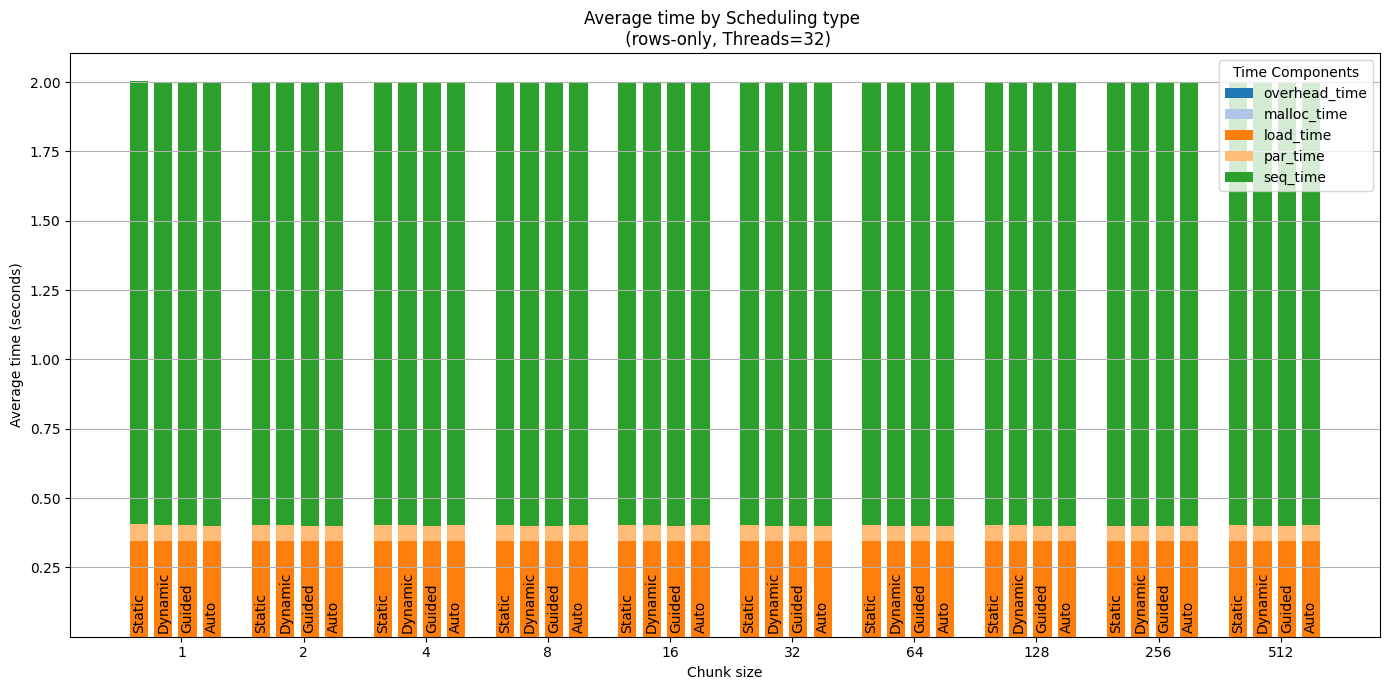

In [8]:
fixed_threads = 32
fixed_method = 'rows-only'

filtered_data = data[(data['num_threads'] == fixed_threads) & (data['method_name'] == fixed_method)]

grouped = filtered_data.groupby(['chunk_size', 'scheduling_type']).mean(numeric_only=True).reset_index()

chunk_sizes = sorted(grouped['chunk_size'].unique())
scheduling_values = sorted(grouped['scheduling_type'].unique())
time_components = ['overhead_time', 'malloc_time', 'load_time', 'par_time', 'seq_time']

bar_width = 0.15
bar_spacing = 0.05
group_width = (bar_width + bar_spacing) * len(scheduling_values)
x = np.arange(len(chunk_sizes)) * (group_width + 0.2)

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(14, 7))

for i, sched in enumerate(scheduling_values):

	bottoms = np.zeros(len(chunk_sizes))

	for j, comp in enumerate(time_components):

		comp_values = []

		for chunk in chunk_sizes:

			row = grouped[(grouped['chunk_size'] == chunk) & (grouped['scheduling_type'] == sched)]
			val = row[comp].values[0] if not row.empty else 0
			comp_values.append(val)

		bar_positions = x + i * (bar_width + bar_spacing)

		ax.bar(bar_positions, comp_values, bottom=bottoms, width=bar_width, label=comp if i == 0 else "", color=colors[j])
		bottoms += np.array(comp_values)

	total_heights = bottoms
	bar_positions = x + i * (bar_width + bar_spacing)

	for xpos, height in zip(bar_positions, total_heights):

		ax.text(xpos, 0.015, scheduling_types[sched], ha='center', va='bottom', rotation=90)

ax.set_xticks(x + group_width / 2 - bar_spacing)
ax.set_xticklabels(chunk_sizes)
ax.set_xlabel('Chunk size')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average time by Scheduling type \n (rows-only, Threads={fixed_threads})')
ax.legend(title='Time Components')
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'stacked_bar_chunk_scheduling_avg_rows_only.1.png'))
plt.show()


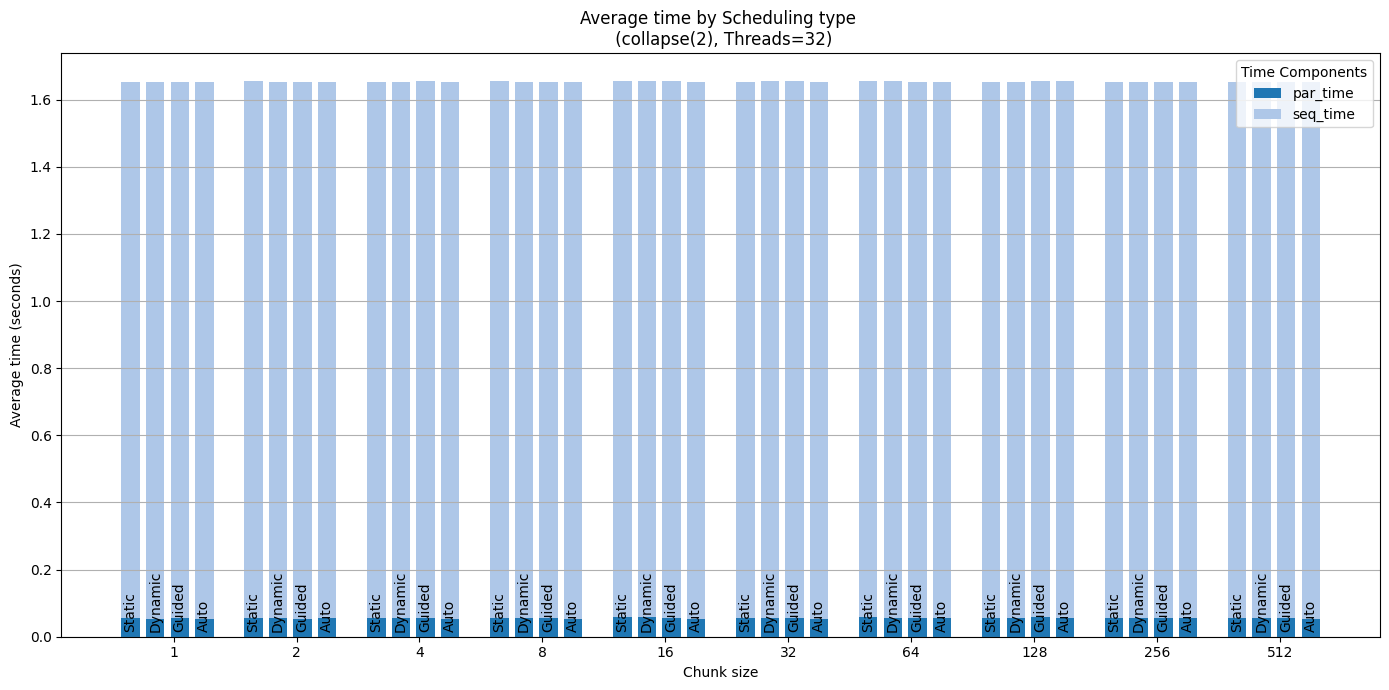

In [9]:
fixed_threads = 32
fixed_method = 'collapse(2)'


filtered_data = data[(data['num_threads'] == fixed_threads) & (data['method_name'] == fixed_method)]

grouped = filtered_data.groupby(['chunk_size', 'scheduling_type']).mean(numeric_only=True).reset_index()

chunk_sizes = sorted(grouped['chunk_size'].unique())
scheduling_values = sorted(grouped['scheduling_type'].unique())
time_components = ['par_time', 'seq_time']


bar_width = 0.15
bar_spacing = 0.05
group_width = (bar_width + bar_spacing) * len(scheduling_values)
x = np.arange(len(chunk_sizes)) * (group_width + 0.2)

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(14, 7))

for i, sched in enumerate(scheduling_values):

	bottoms = np.zeros(len(chunk_sizes))

	for j, comp in enumerate(time_components):

		comp_values = []

		for chunk in chunk_sizes:

			row = grouped[(grouped['chunk_size'] == chunk) & (grouped['scheduling_type'] == sched)]
			val = row[comp].values[0] if not row.empty else 0
			comp_values.append(val)

		bar_positions = x + i * (bar_width + bar_spacing)

		ax.bar(bar_positions, comp_values, bottom=bottoms, width=bar_width, label=comp if i == 0 else "", color=colors[j])
		bottoms += np.array(comp_values)

	total_heights = bottoms
	bar_positions = x + i * (bar_width + bar_spacing)

	for xpos, height in zip(bar_positions, total_heights):

		ax.text(xpos, 0.015, scheduling_types[sched], ha='center', va='bottom', rotation=90)

ax.set_xticks(x + group_width / 2 - bar_spacing)
ax.set_xticklabels(chunk_sizes)
ax.set_xlabel('Chunk size')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average time by Scheduling type \n (collapse(2), Threads={fixed_threads})')
ax.legend(title='Time Components')
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'stacked_bar_chunk_scheduling_avg.2_collapse.png'))
plt.show()


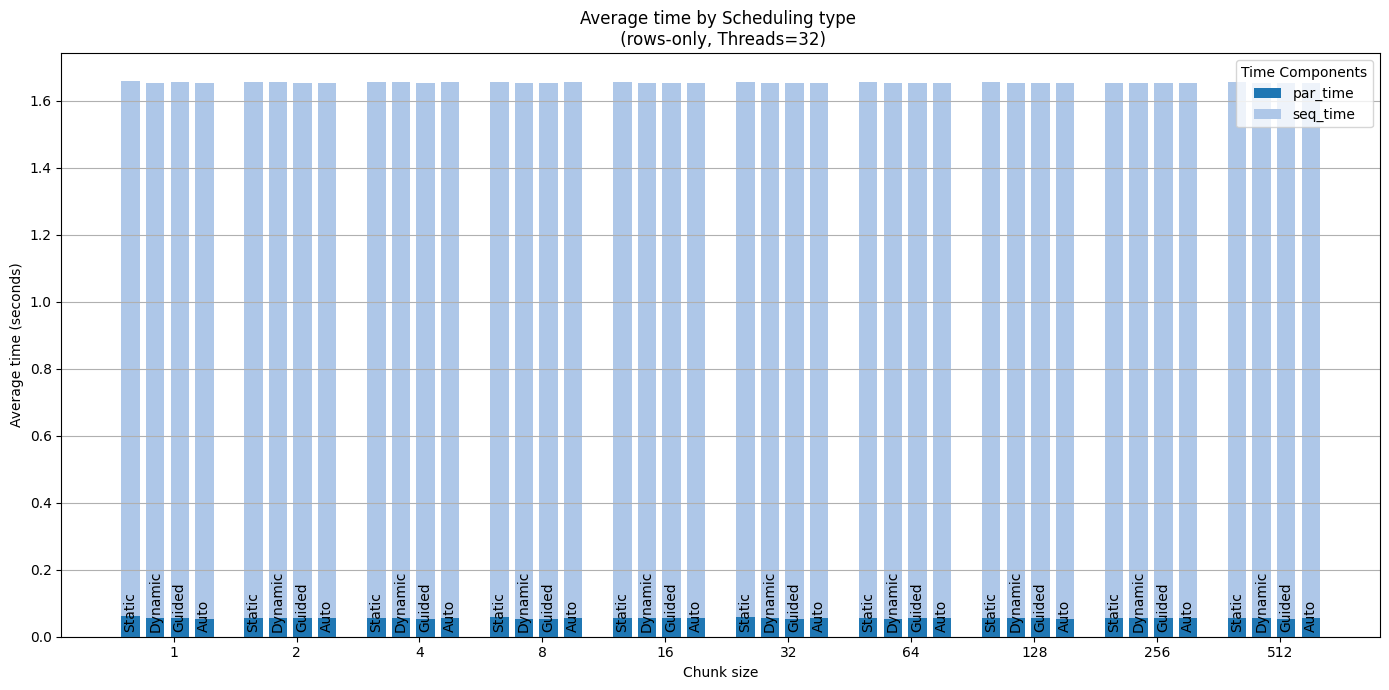

In [10]:
fixed_threads = 32
fixed_method = 'rows-only'


filtered_data = data[(data['num_threads'] == fixed_threads) & (data['method_name'] == fixed_method)]

grouped = filtered_data.groupby(['chunk_size', 'scheduling_type']).mean(numeric_only=True).reset_index()

chunk_sizes = sorted(grouped['chunk_size'].unique())
scheduling_values = sorted(grouped['scheduling_type'].unique())
time_components = ['par_time', 'seq_time']


bar_width = 0.15
bar_spacing = 0.05
group_width = (bar_width + bar_spacing) * len(scheduling_values)
x = np.arange(len(chunk_sizes)) * (group_width + 0.2)

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(14, 7))

for i, sched in enumerate(scheduling_values):

	bottoms = np.zeros(len(chunk_sizes))

	for j, comp in enumerate(time_components):

		comp_values = []

		for chunk in chunk_sizes:

			row = grouped[(grouped['chunk_size'] == chunk) & (grouped['scheduling_type'] == sched)]
			val = row[comp].values[0] if not row.empty else 0
			comp_values.append(val)

		bar_positions = x + i * (bar_width + bar_spacing)

		ax.bar(bar_positions, comp_values, bottom=bottoms, width=bar_width, label=comp if i == 0 else "", color=colors[j])
		bottoms += np.array(comp_values)

	total_heights = bottoms
	bar_positions = x + i * (bar_width + bar_spacing)

	for xpos, height in zip(bar_positions, total_heights):

		ax.text(xpos, 0.015, scheduling_types[sched], ha='center', va='bottom', rotation=90)

ax.set_xticks(x + group_width / 2 - bar_spacing)
ax.set_xticklabels(chunk_sizes)
ax.set_xlabel('Chunk size')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average time by Scheduling type \n (rows-only, Threads={fixed_threads})')
ax.legend(title='Time Components')
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'stacked_bar_chunk_scheduling_avg.2_rows_only.png'))
plt.show()


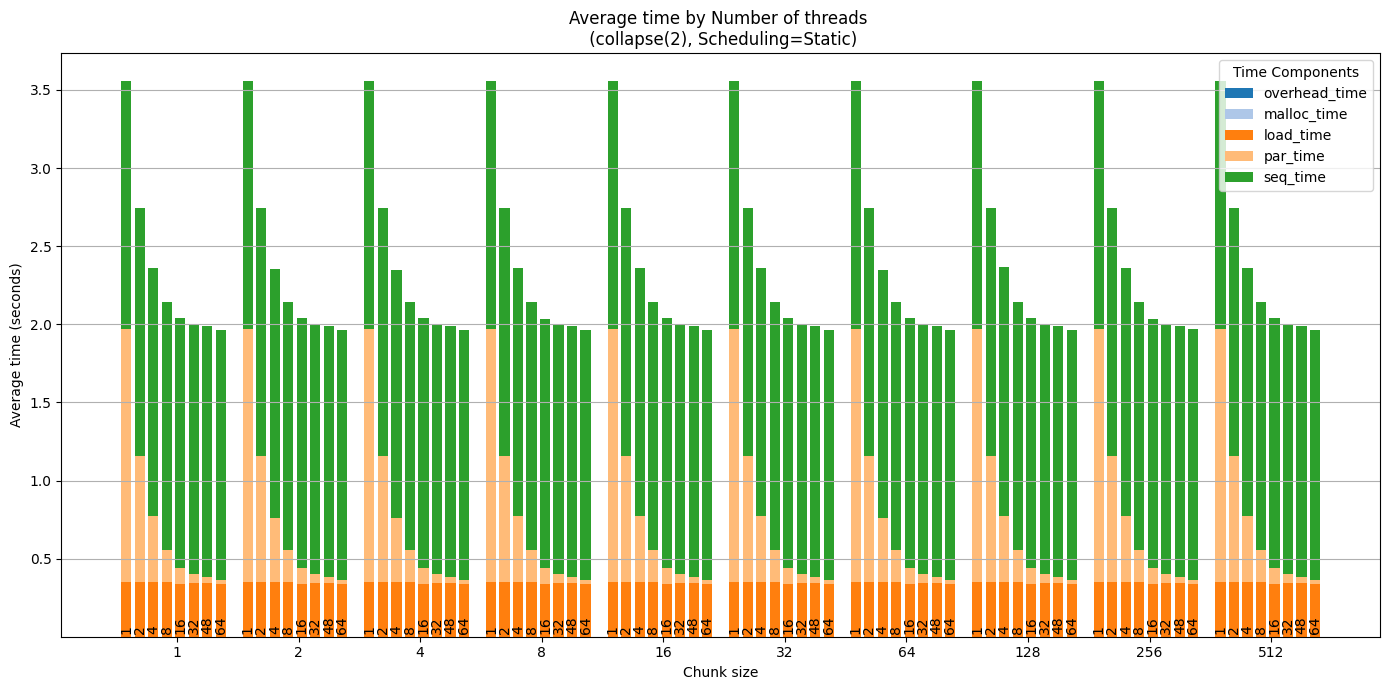

In [11]:
fixed_scheduling_type = 1
fixed_method = 'collapse(2)'

filtered_data = data[(data['scheduling_type'] == fixed_scheduling_type) & (data['method_name'] == fixed_method)]

grouped = filtered_data.groupby(['chunk_size', 'num_threads']).mean(numeric_only=True).reset_index()

chunk_sizes = sorted(grouped['chunk_size'].unique())
thread_values = sorted(grouped['num_threads'].unique())
time_components = ['overhead_time', 'malloc_time', 'load_time', 'par_time', 'seq_time']

bar_width = 0.15
bar_spacing = 0.05
group_width = (bar_width + bar_spacing) * len(thread_values)
x = np.arange(len(chunk_sizes)) * (group_width + 0.2)

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(14, 7))

for i, thread_value in enumerate(thread_values):

	bottoms = np.zeros(len(chunk_sizes))

	for j, comp in enumerate(time_components):

		comp_values = []

		for chunk in chunk_sizes:

			row = grouped[(grouped['chunk_size'] == chunk) & (grouped['num_threads'] == thread_value)]
			val = row[comp].values[0] if not row.empty else 0
			comp_values.append(val)

		bar_positions = x + i * (bar_width + bar_spacing)

		bars = ax.bar(bar_positions, comp_values, bottom=bottoms, width=bar_width, label=comp if i == 0 else "", color=colors[j])
		bottoms += np.array(comp_values)

	total_heights = bottoms
	bar_positions = x + i * (bar_width + bar_spacing)

	for xpos, height in zip(bar_positions, total_heights):

		ax.text(xpos, 0.015, thread_value, ha='center', va='bottom', rotation=90)

ax.set_xticks(x + group_width / 2 - bar_spacing)
ax.set_xticklabels(chunk_sizes)
ax.set_xlabel('Chunk size')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average time by Number of threads \n (collapse(2), Scheduling={scheduling_types[fixed_scheduling_type]})')
ax.legend(title='Time Components')
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'stacked_bar_chunk_threads_avg.1_collapse.png'))
plt.show()


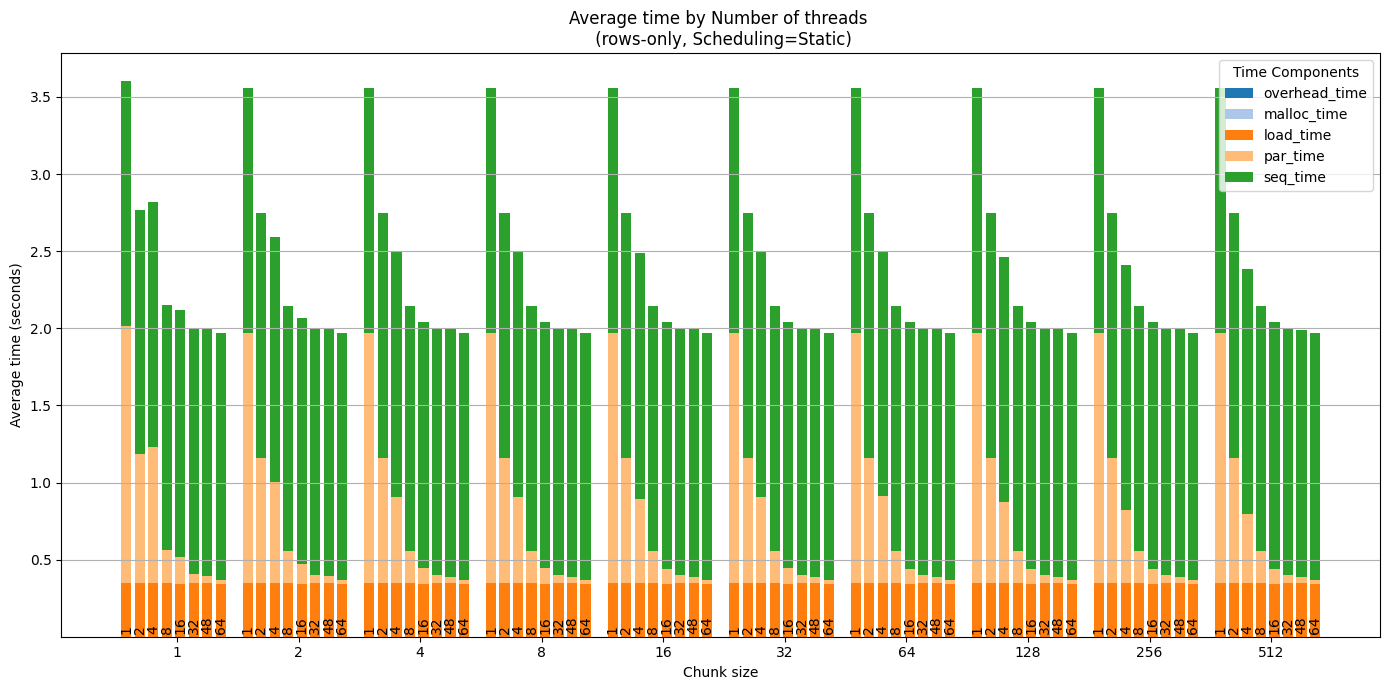

In [12]:
fixed_scheduling_type = 1
fixed_method = 'rows-only'

filtered_data = data[(data['scheduling_type'] == fixed_scheduling_type) & (data['method_name'] == fixed_method)]

grouped = filtered_data.groupby(['chunk_size', 'num_threads']).mean(numeric_only=True).reset_index()

chunk_sizes = sorted(grouped['chunk_size'].unique())
thread_values = sorted(grouped['num_threads'].unique())
time_components = ['overhead_time', 'malloc_time', 'load_time', 'par_time', 'seq_time']

bar_width = 0.15
bar_spacing = 0.05
group_width = (bar_width + bar_spacing) * len(thread_values)
x = np.arange(len(chunk_sizes)) * (group_width + 0.2)

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(14, 7))

for i, thread_value in enumerate(thread_values):

	bottoms = np.zeros(len(chunk_sizes))

	for j, comp in enumerate(time_components):

		comp_values = []

		for chunk in chunk_sizes:

			row = grouped[(grouped['chunk_size'] == chunk) & (grouped['num_threads'] == thread_value)]
			val = row[comp].values[0] if not row.empty else 0
			comp_values.append(val)

		bar_positions = x + i * (bar_width + bar_spacing)

		bars = ax.bar(bar_positions, comp_values, bottom=bottoms, width=bar_width, label=comp if i == 0 else "", color=colors[j])
		bottoms += np.array(comp_values)

	total_heights = bottoms
	bar_positions = x + i * (bar_width + bar_spacing)

	for xpos, height in zip(bar_positions, total_heights):

		ax.text(xpos, 0.015, thread_value, ha='center', va='bottom', rotation=90)

ax.set_xticks(x + group_width / 2 - bar_spacing)
ax.set_xticklabels(chunk_sizes)
ax.set_xlabel('Chunk size')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average time by Number of threads \n (rows-only, Scheduling={scheduling_types[fixed_scheduling_type]})')
ax.legend(title='Time Components')
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'stacked_bar_chunk_threads_avg.1_rows_only.png'))
plt.show()


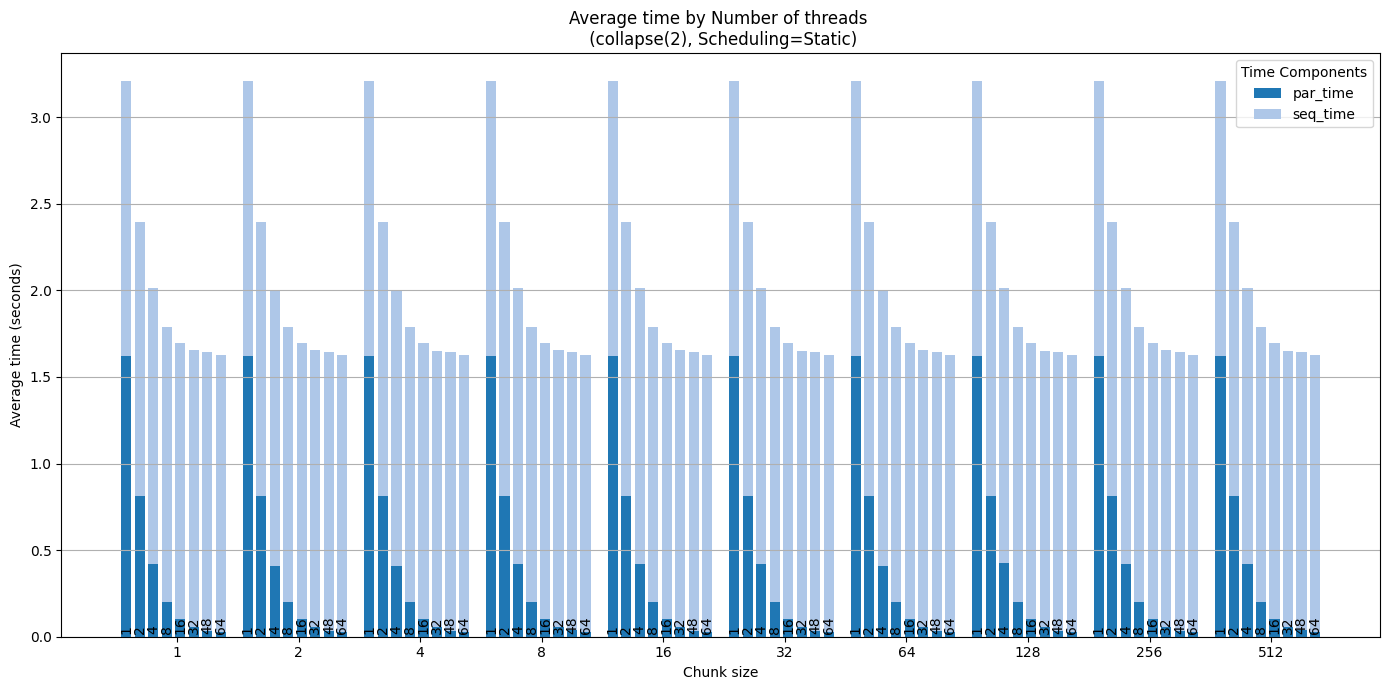

In [13]:
fixed_scheduling_type = 1
fixed_method = 'collapse(2)'

filtered_data = data[(data['scheduling_type'] == fixed_scheduling_type) & (data['method_name'] == fixed_method)]


grouped = filtered_data.groupby(['chunk_size', 'num_threads']).mean(numeric_only=True).reset_index()

chunk_sizes = sorted(grouped['chunk_size'].unique())
thread_values = sorted(grouped['num_threads'].unique())
time_components = ['par_time', 'seq_time']

bar_width = 0.15
bar_spacing = 0.05
group_width = (bar_width + bar_spacing) * len(thread_values)
x = np.arange(len(chunk_sizes)) * (group_width + 0.2)

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(14, 7))

for i, thread_value in enumerate(thread_values):

	bottoms = np.zeros(len(chunk_sizes))

	for j, comp in enumerate(time_components):

		comp_values = []

		for chunk in chunk_sizes:

			row = grouped[(grouped['chunk_size'] == chunk) & (grouped['num_threads'] == thread_value)]
			val = row[comp].values[0] if not row.empty else 0
			comp_values.append(val)

		bar_positions = x + i * (bar_width + bar_spacing)

		bars = ax.bar(bar_positions, comp_values, bottom=bottoms, width=bar_width, label=comp if i == 0 else "", color=colors[j])
		bottoms += np.array(comp_values)

	total_heights = bottoms
	bar_positions = x + i * (bar_width + bar_spacing)

	for xpos, height in zip(bar_positions, total_heights):

		ax.text(xpos, 0.015, thread_value, ha='center', va='bottom', rotation=90)

ax.set_xticks(x + group_width / 2 - bar_spacing)
ax.set_xticklabels(chunk_sizes)
ax.set_xlabel('Chunk size')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average time by Number of threads \n (collapse(2), Scheduling={scheduling_types[fixed_scheduling_type]})')
ax.legend(title='Time Components')
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'stacked_bar_chunk_threads_avg.2_collapse.png'))
plt.show()


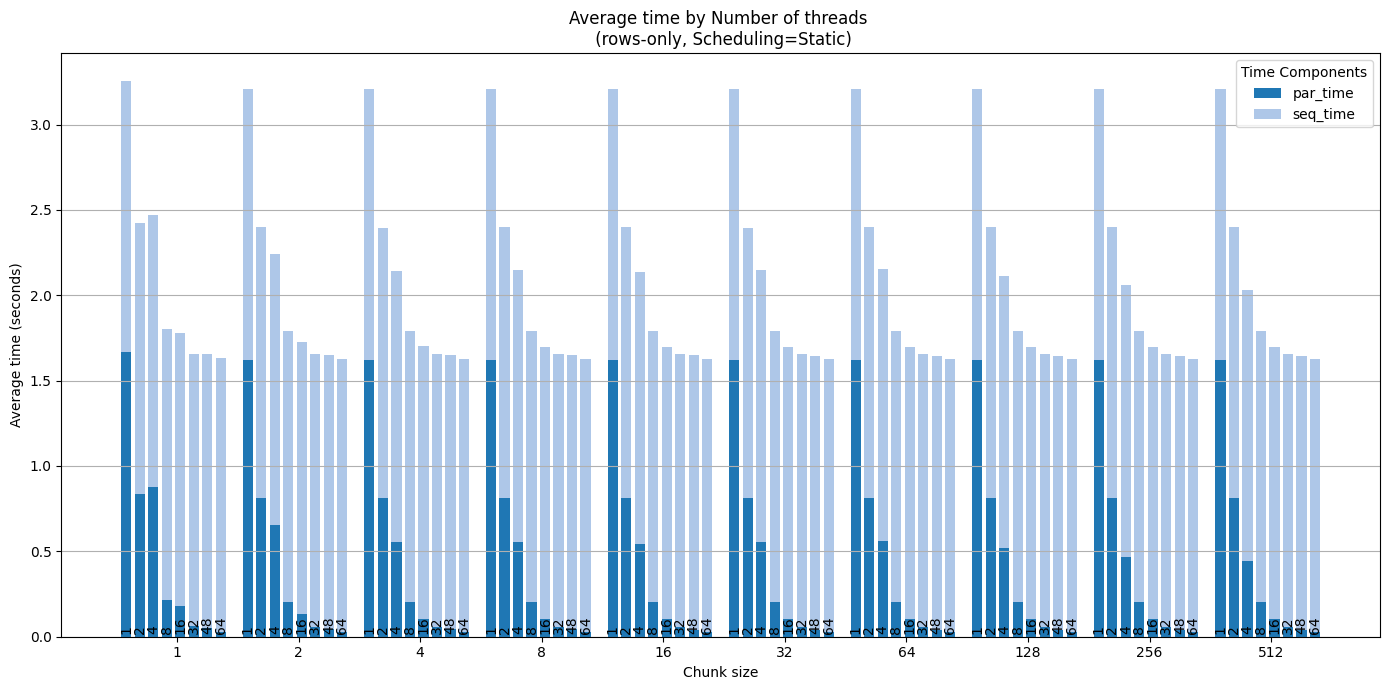

In [14]:
fixed_scheduling_type = 1
fixed_method = 'rows-only'

filtered_data = data[(data['scheduling_type'] == fixed_scheduling_type) & (data['method_name'] == fixed_method)]


grouped = filtered_data.groupby(['chunk_size', 'num_threads']).mean(numeric_only=True).reset_index()

chunk_sizes = sorted(grouped['chunk_size'].unique())
thread_values = sorted(grouped['num_threads'].unique())
time_components = ['par_time', 'seq_time']

bar_width = 0.15
bar_spacing = 0.05
group_width = (bar_width + bar_spacing) * len(thread_values)
x = np.arange(len(chunk_sizes)) * (group_width + 0.2)

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(14, 7))

for i, thread_value in enumerate(thread_values):

	bottoms = np.zeros(len(chunk_sizes))

	for j, comp in enumerate(time_components):

		comp_values = []

		for chunk in chunk_sizes:

			row = grouped[(grouped['chunk_size'] == chunk) & (grouped['num_threads'] == thread_value)]
			val = row[comp].values[0] if not row.empty else 0
			comp_values.append(val)

		bar_positions = x + i * (bar_width + bar_spacing)

		bars = ax.bar(bar_positions, comp_values, bottom=bottoms, width=bar_width, label=comp if i == 0 else "", color=colors[j])
		bottoms += np.array(comp_values)

	total_heights = bottoms
	bar_positions = x + i * (bar_width + bar_spacing)

	for xpos, height in zip(bar_positions, total_heights):

		ax.text(xpos, 0.015, thread_value, ha='center', va='bottom', rotation=90)

ax.set_xticks(x + group_width / 2 - bar_spacing)
ax.set_xticklabels(chunk_sizes)
ax.set_xlabel('Chunk size')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average time by Number of threads \n (rows-only, Scheduling={scheduling_types[fixed_scheduling_type]})')
ax.legend(title='Time Components')
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'stacked_bar_chunk_threads_avg.2_rows-only.png'))
plt.show()


In [15]:
data_filtered = data

min_threads = data_filtered['num_threads'].min()
ref_dataset_collapse = data_filtered[data_filtered['num_threads'] == min_threads & (data_filtered['method_name'] == 'collapse(2)')]
ref_dataset_rows = data_filtered[data_filtered['num_threads'] == min_threads & (data_filtered['method_name'] == 'rows-only')]


ref_times_collapse = ref_dataset_collapse.groupby(['scheduling_type', 'chunk_size'])['par_time'].mean()
ref_times_rows = ref_dataset_rows.groupby(['scheduling_type', 'chunk_size'])['par_time'].mean()

summary_data = []

for (threads_value, sched_type, chunk_size), group in data_filtered.groupby(['num_threads', 'scheduling_type', 'chunk_size']):

	mean_collapse_time = group[group['method_name']=='collapse(2)']['par_time'].mean()
	mean_rows_time = group[group['method_name']=='rows-only']['par_time'].mean()

	ref_time_collapse = ref_times_collapse.get((sched_type, chunk_size), None)
	speedup_collapse = ref_time_collapse / mean_collapse_time
	efficiency_collapse = speedup_collapse / threads_value

	ref_time_rows = ref_times_rows.get((sched_type, chunk_size), None)
	speedup_rows = ref_time_rows / mean_rows_time
	efficiency_rows = speedup_rows / threads_value

	# Given by the best sequential time
	seq_time = 1.3064
	sequential_collapse_speedup = seq_time / mean_collapse_time
	sequential_rows_speedup = seq_time / mean_rows_time

	summary_data.append([
		threads_value,
		sched_type,
		scheduling_types[sched_type],
		chunk_size,
		mean_collapse_time,
		mean_rows_time,
		ref_time_collapse,
		ref_time_rows,
		speedup_collapse,
		speedup_rows,
		efficiency_collapse,
		efficiency_rows,
		sequential_collapse_speedup,
		sequential_rows_speedup,
	])

summary_df = pd.DataFrame(summary_data, columns=[
	'Number of threads',
	'Scheduling type',
	'Scheduling type name',
	'Chunk size',
	'Mean Collapse Time',
	'Mean Rows Time',
	'Ref. Collapse Time',
	'Ref. Rows Time',
	'Speedup Collapse',
	'Speedup Rows',
	'Efficiency Collapse',
	'Efficiency Rows',
	'Sequential Collapse Speedup',
	'Sequential Rows Speedup',
])

summary_df = summary_df.round(5)

display(summary_df)

# Save summary DataFrame to LaTeX
summary_df.to_latex(os.path.join(images_dir, 'summary_df.tex'), index=False, float_format="%.5f")

,Number of threads,Scheduling type,Scheduling type name,Chunk size,Mean Collapse Time,Mean Rows Time,Ref. Collapse Time,Ref. Rows Time,Speedup Collapse,Speedup Rows,Efficiency Collapse,Efficiency Rows,Sequential Collapse Speedup,Sequential Rows Speedup
0,1,1,Static,1,1.62070,1.66659,1.62070,1.66659,1.00000,1.00000,1.00000,1.00000,0.80607,0.78388
1,1,1,Static,2,1.62036,1.62101,1.62036,1.62101,1.00000,1.00000,1.00000,1.00000,0.80624,0.80592
2,1,1,Static,4,1.62037,1.62072,1.62037,1.62072,1.00000,1.00000,1.00000,1.00000,0.80624,0.80606
3,1,1,Static,8,1.62035,1.62097,1.62035,1.62097,1.00000,1.00000,1.00000,1.00000,0.80625,0.80593
4,1,1,Static,16,1.62051,1.62095,1.62051,1.62095,1.00000,1.00000,1.00000,1.00000,0.80616,0.80595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,64,4,Auto,32,0.02575,0.02623,1.62055,1.62096,62.94066,61.79153,0.98345,0.96549,50.73950,49.80038
316,64,4,Auto,64,0.02617,0.02620,1.62040,1.62058,61.92795,61.84856,0.96762,0.96638,49.92770,49.85816
317,64,4,Auto,128,0.02573,0.02619,1.62048,1.62086,62.99023,61.89068,0.98422,0.96704,50.78164,49.88348
318,64,4,Auto,256,0.02574,0.02623,1.62051,1.62085,62.96369,61.80081,0.98381,0.96564,50.75915,49.81133


/tmp/ipykernel_12152/3926858495.py:70: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  summary_df.to_latex(os.path.join(images_dir, 'summary_df.tex'), index=False, float_format="%.5f")


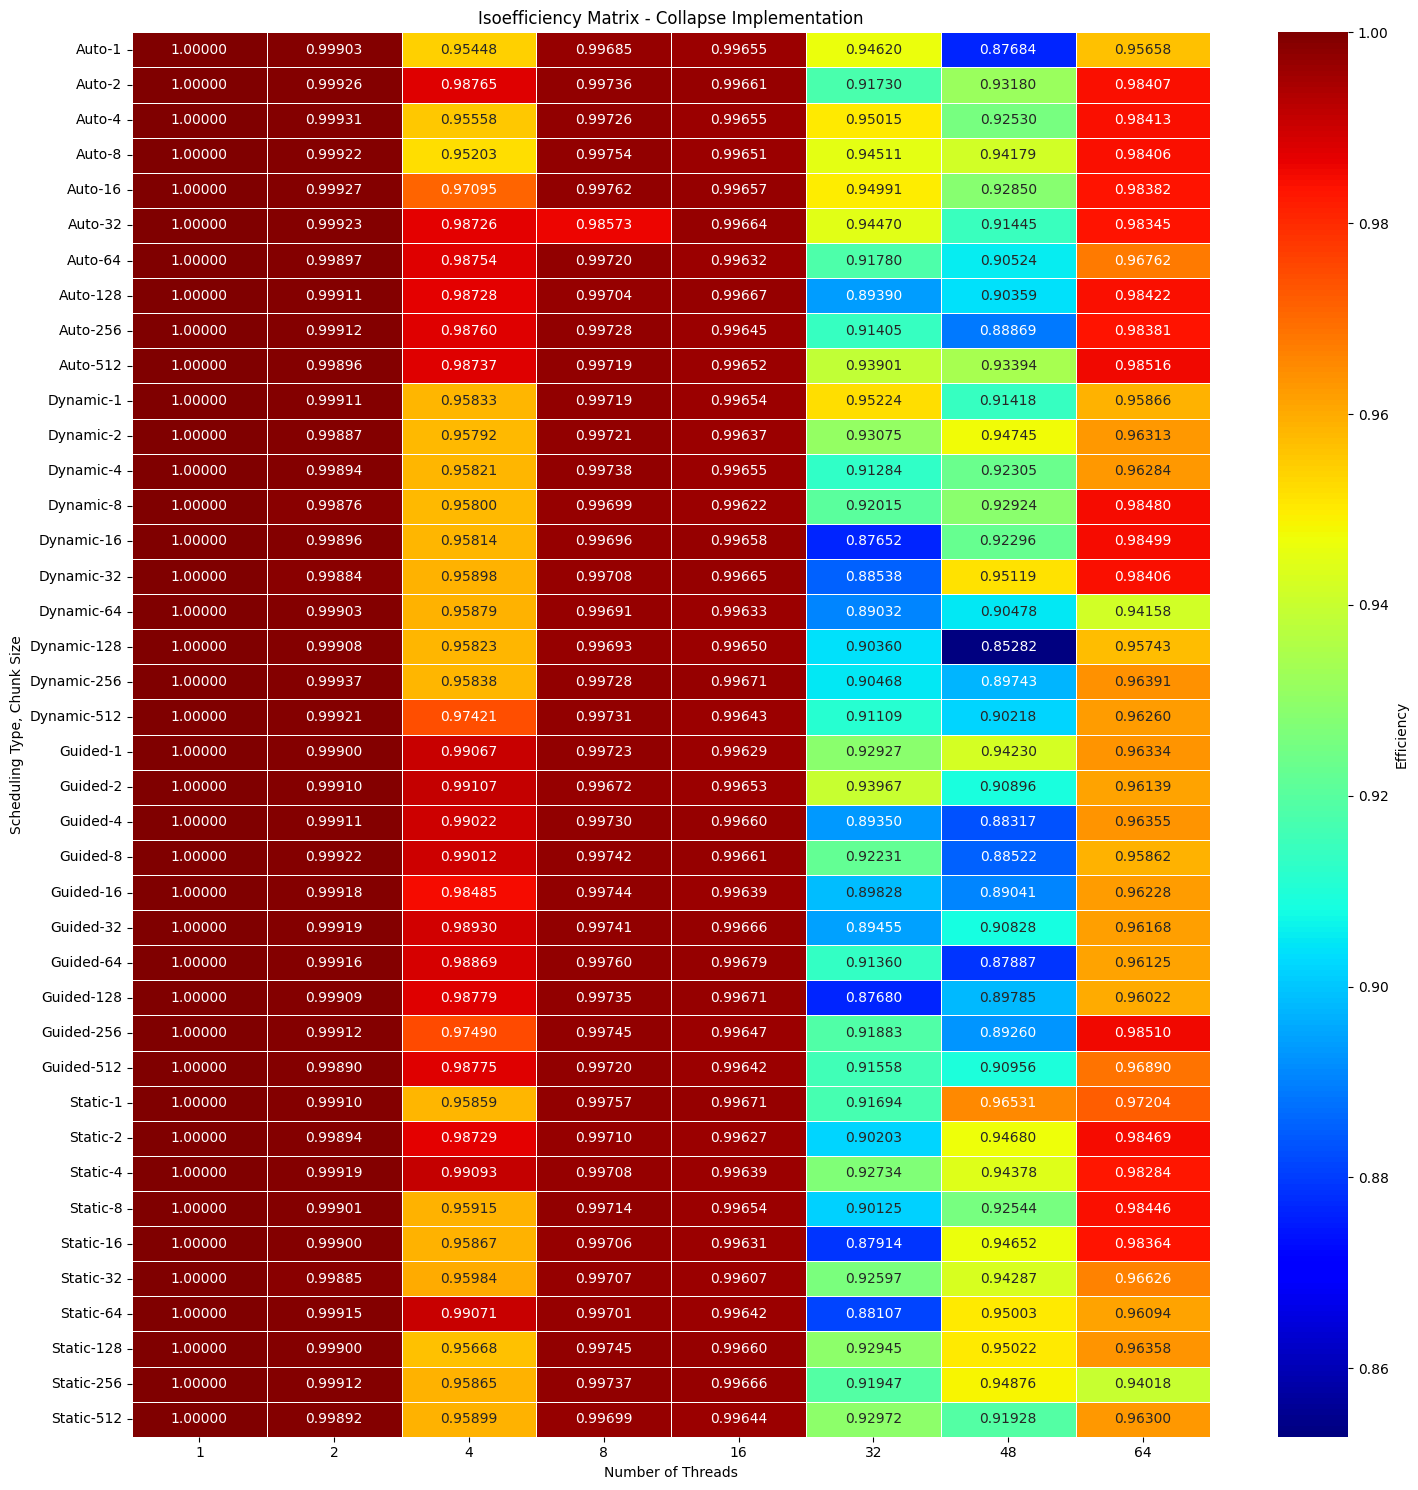

In [16]:
auto_pivot = pd.pivot_table(
	summary_df,
	values='Efficiency Collapse',
	index=['Scheduling type name', 'Chunk size'],
	columns='Number of threads'
)

plt.figure(figsize=(15, 15))

sns.heatmap(auto_pivot, annot=True, fmt=".5f", cmap='jet', cbar_kws={'label': 'Efficiency'}, linewidths=0.5, linecolor='white')

plt.title('Isoefficiency Matrix - Collapse Implementation')
plt.ylabel('Scheduling Type, Chunk Size')
plt.xlabel('Number of Threads')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'isoefficiency_collapse.png'))

plt.show()


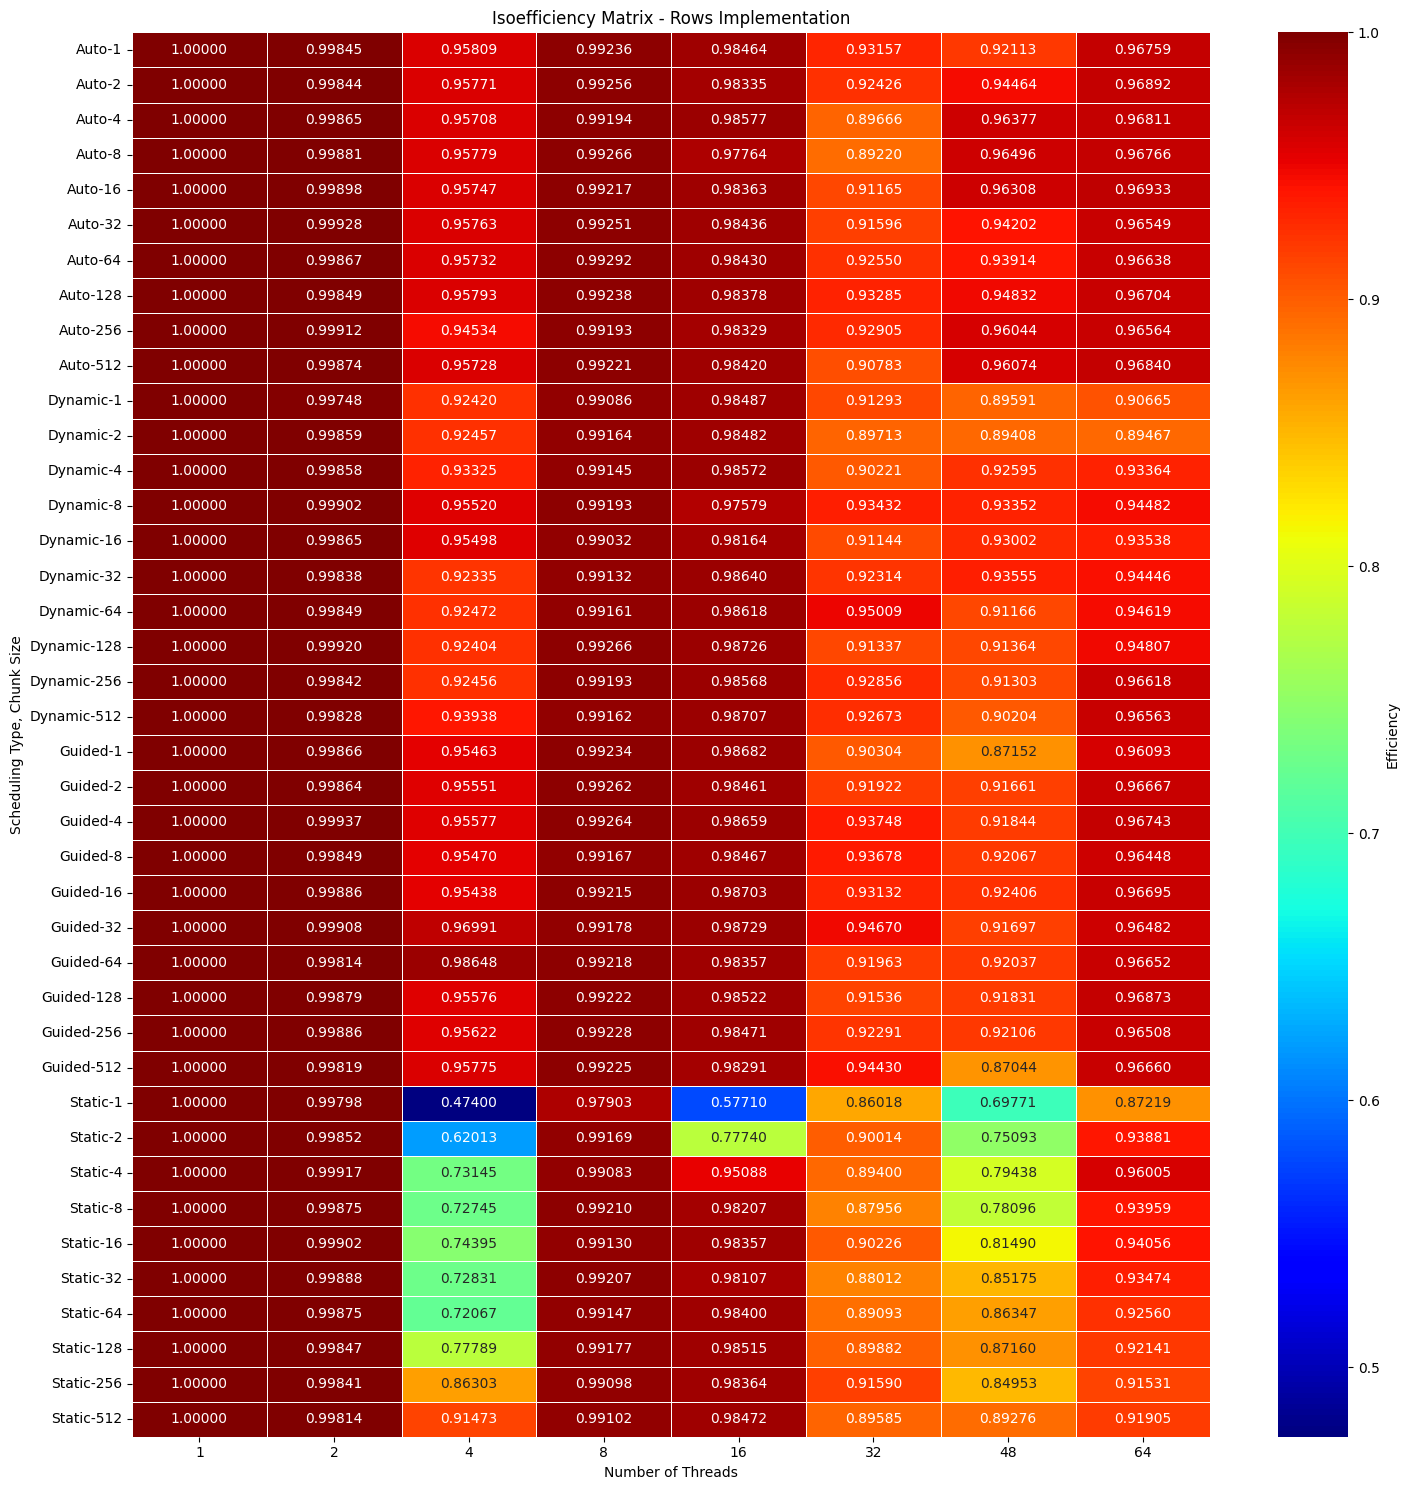

In [17]:
manual_pivot = pd.pivot_table(
	summary_df,
	values='Efficiency Rows',
	index=['Scheduling type name', 'Chunk size'],
	columns='Number of threads'
)

plt.figure(figsize=(15, 15))

sns.heatmap(manual_pivot, annot=True, fmt=".5f", cmap='jet', cbar_kws={'label': 'Efficiency'}, linewidths=0.5, linecolor='white')

plt.title('Isoefficiency Matrix - Rows Implementation')
plt.ylabel('Scheduling Type, Chunk Size')
plt.xlabel('Number of Threads')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'isoefficiency_rows.png'))

plt.show()

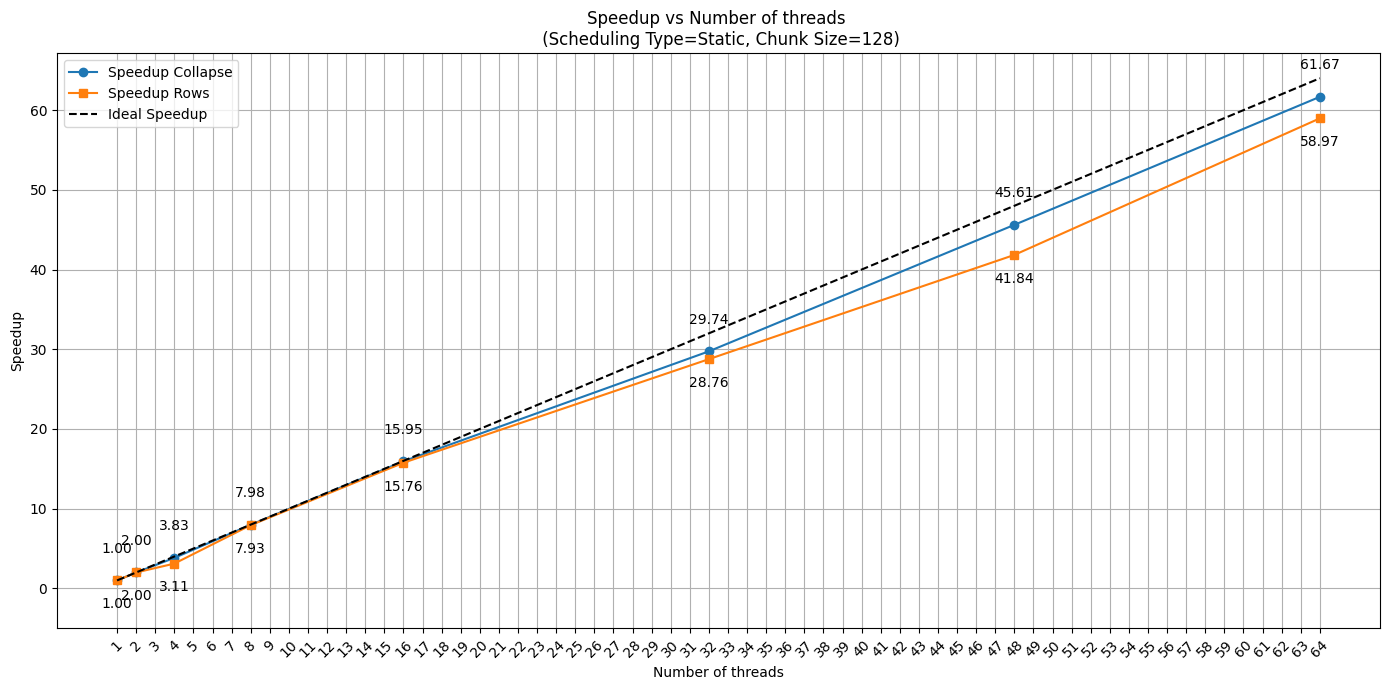

In [24]:
fixed_scheduling_type = 1
fixed_chunk_size = 128

filtered_df = summary_df[ (summary_df['Scheduling type'] == fixed_scheduling_type) & (summary_df['Chunk size'] == fixed_chunk_size)]

filtered_df = filtered_df.sort_values('Number of threads')
max_threads = filtered_df['Number of threads'].max()

plt.figure(figsize=(14, 7))

plt.plot(filtered_df['Number of threads'], filtered_df['Speedup Collapse'], marker='o', label='Speedup Collapse')
plt.plot(filtered_df['Number of threads'], filtered_df['Speedup Rows'], marker='s', label='Speedup Rows')
plt.plot([1, max_threads], [1, max_threads], 'k--', label='Ideal Speedup')

plt.title(f'Speedup vs Number of threads \n (Scheduling Type={scheduling_types[fixed_scheduling_type]}, Chunk Size={fixed_chunk_size})')
plt.xlabel('Number of threads')
plt.ylabel('Speedup')

plt.xticks(range(1, max_threads + 1), rotation=45)
plt.yticks()
plt.ylim(bottom=-5)

plt.grid()

plt.legend()

for i, row in filtered_df.iterrows():

	plt.annotate(f"{row['Speedup Collapse']:.2f}", (row['Number of threads'], row['Speedup Collapse']), textcoords="offset points", xytext=(0,20), ha='center')
	plt.annotate(f"{row['Speedup Rows']:.2f}", (row['Number of threads'], row['Speedup Rows']), textcoords="offset points", xytext=(0,-20), ha='center')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'speedup_vs_threads.png'))

plt.show()


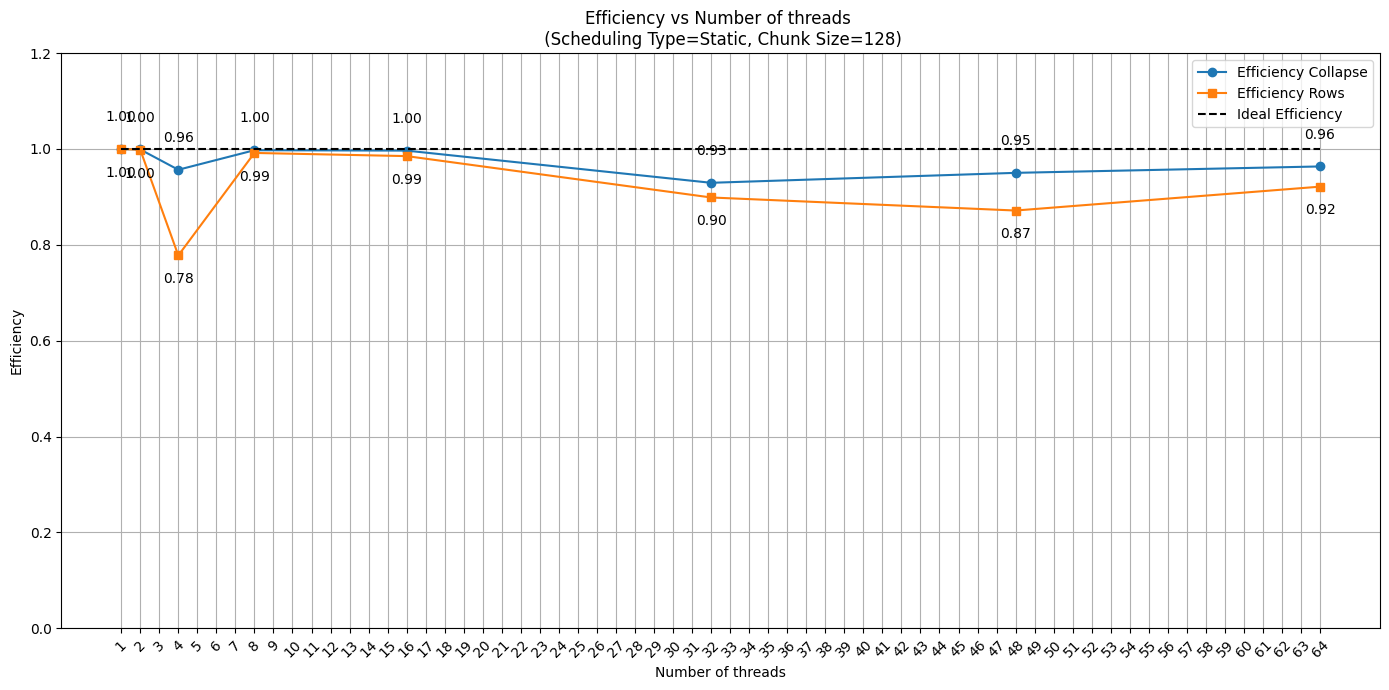

In [27]:
fixed_scheduling_type = 1
fixed_chunk_size = 128

filtered_df = summary_df[(summary_df['Scheduling type'] == fixed_scheduling_type) & (summary_df['Chunk size'] == fixed_chunk_size)]

filtered_df = filtered_df.sort_values('Number of threads')
max_threads = filtered_df['Number of threads'].max()

plt.figure(figsize=(14, 7))

plt.plot(filtered_df['Number of threads'], filtered_df['Efficiency Collapse'], marker='o', label='Efficiency Collapse')
plt.plot(filtered_df['Number of threads'], filtered_df['Efficiency Rows'], marker='s', label='Efficiency Rows')
plt.plot([1, max_threads], [1, 1], 'k--', label='Ideal Efficiency')

plt.title(f'Efficiency vs Number of threads \n (Scheduling Type={scheduling_types[fixed_scheduling_type]}, Chunk Size={fixed_chunk_size})')
plt.xlabel('Number of threads')
plt.ylabel('Efficiency')

plt.xticks(range(1, max_threads + 1), rotation=45)
plt.yticks()
plt.ylim(0, 1.2)

plt.grid()

plt.legend()

for i, row in filtered_df.iterrows():

	plt.annotate(f"{row['Efficiency Collapse']:.2f}", (row['Number of threads'], row['Efficiency Collapse']), textcoords="offset points", xytext=(0,20), ha='center')
	plt.annotate(f"{row['Efficiency Rows']:.2f}", (row['Number of threads'], row['Efficiency Rows']), textcoords="offset points", xytext=(0,-20), ha='center')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'efficiency_vs_threads.png'))

plt.show()
